In [1]:
print("MUHAMMAD SHAFI\nFA18-CSE-088")

MUHAMMAD SHAFI
FA18-CSE-088


In [2]:
####### ANSWER NO:01 ########
#univariate selection method


#it used statistical test to determine which features have the strongest correlation with to
#the output variable
import pandas as pd


In [3]:
import numpy as np
#sklearn.feature_selection used can be used for feature selection or dimensionlaity reduction
#on sample sets
from sklearn.feature_selection import SelectKBest #SelectKBest: select the 'k' best features

In [4]:
#chi2 determine the likelihood of correlation or association between categorical variables
from sklearn.feature_selection import chi2

In [5]:

#ExtraTreesClassifier: it is ensemble learning method that randomises certain descisions
#and learning of data to minimize the over-learning and overfitting
from sklearn.ensemble import ExtraTreesClassifier #used in feature importance method

In [6]:

import seaborn as sns   #used visualization and data analysis

In [7]:
import matplotlib.pyplot as plt #deals with plot, graph, figures

In [9]:
data = pd.read_csv("Test.csv") #pd.read_csv; is a pandas function used to read the csv file

In [10]:
X = data.iloc[:,0:20] #independent columns

In [11]:
y = data.iloc[:,-1] #pick the last column for the target feature

In [12]:
bestfeatures = SelectKBest(score_func=chi2, k=5)#apply selectKBest to select best features

In [13]:
fit = bestfeatures.fit(X,y) #fit the data which is synonymous to train

In [14]:
dfscores = pd.DataFrame(fit.scores_)

In [15]:
dfcolumns = pd.DataFrame(X.columns)

In [16]:

scores = pd.concat([dfcolumns,dfscores],axis=1)

In [17]:
scores.columns = ['specs','score'] #Name of both columns will be 'specs' and 'score'

In [18]:

print("MUHAMMAD SHAFI\nFA18-CSE-088")
print(scores.nlargest(5,'score')) #print the 5 best features

MUHAMMAD SHAFI
FA18-CSE-088
              specs         score
11       Population  7.278615e+10
9       Total Tests  1.579560e+10
0       Total cases  7.244216e+09
4   Total Recovered  5.283405e+09
5      Active Cases  2.070648e+09


In [19]:

#feature importance method

#this determine the score of each feature in datasets. A high score means the featue has
#more importance or relevancy in relation to the output variavle

import pandas as pd

In [20]:
model = ExtraTreesClassifier()

In [22]:
model.fit(X,y)#fit training data, for supervised learning it takes two arguments

ExtraTreesClassifier()

In [23]:
print(model.feature_importances_) #feature_importances is inbuilt class used with 
#ExtraTreesClassifier

[0.09390625 0.036875   0.09554688 0.03007813 0.09078125 0.09515625
 0.09609375 0.094375   0.09664062 0.08960938 0.08820312 0.09273437]


In [24]:
#plot the graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

MUHAMMAD SHAFI
FA18-CSE-088


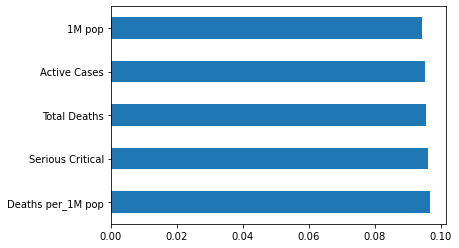

In [25]:
print("MUHAMMAD SHAFI\nFA18-CSE-088")
feat_importances.nlargest(5).plot(kind='barh')#select top five feature in the datasets
plt.show()

In [26]:

#Correlation heatmaps


#also used to find the strongest correlation of feature to output variable
#Correlation is a continuous value between -1 and 1:
#If the correlation between two variables is 1, there is a perfect direct correlation.
#If the correlation between two features is -1, a perfect inverse correlation exists.
#If the correlation is 0 between two features, there is no correlation between the two features.

#heatmaps is a two dimensinal graphical represention of data and the values are represented as
#colors

MUHAMMAD SHAFI
FA18-CSE-088


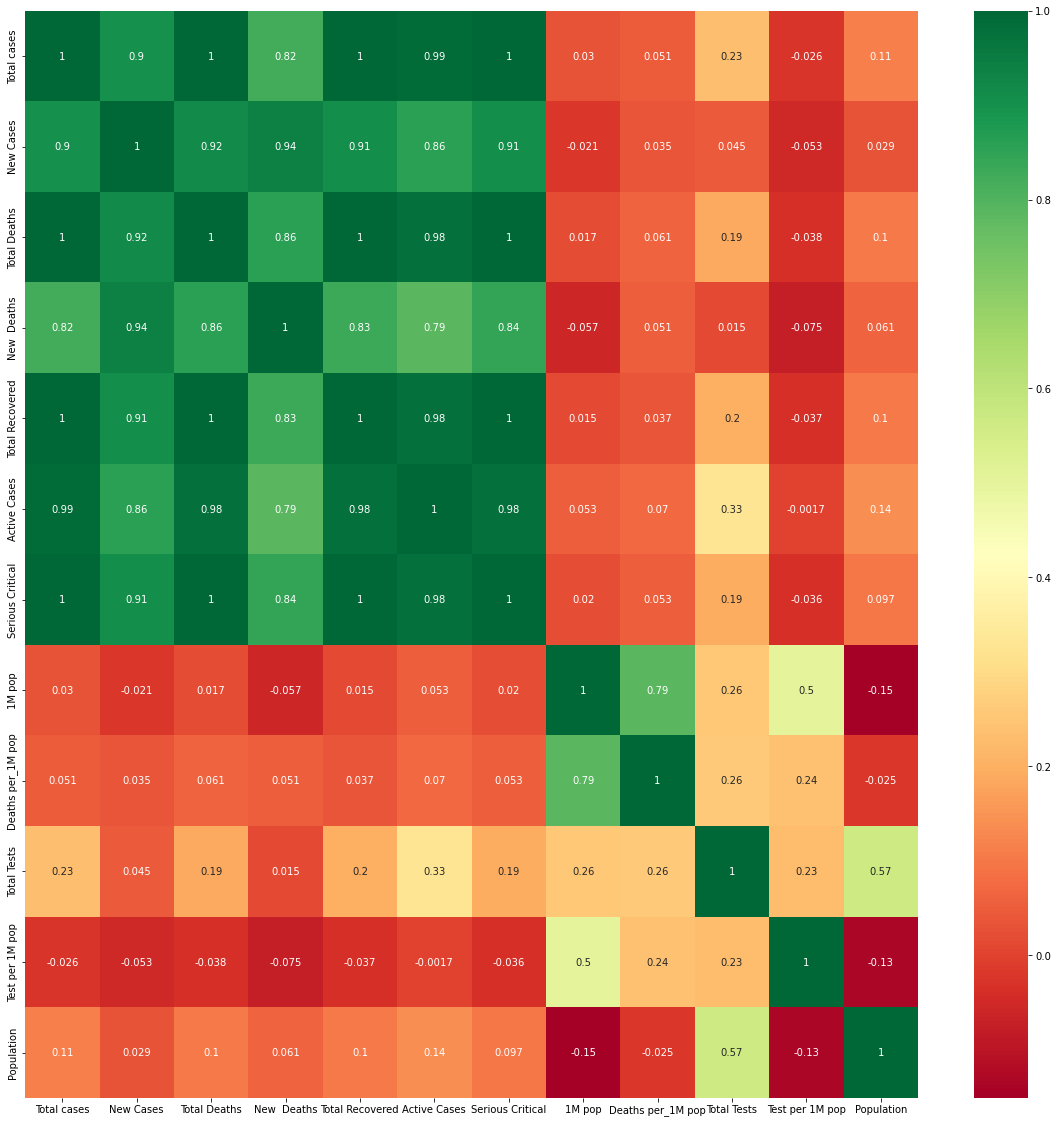

In [33]:
#get the correlations of each feature in the dataset
#corr() function returns a coefficient of correlation between two numbers
correlation_matrix = data.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
print("MUHAMMAD SHAFI\nFA18-CSE-088")
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
####### ANSWER NO:02 ########

#Droping the outliers row with standard deviation
factor = 2 #constant used for multiplocation factor to be multiplied with standard deviation
upper_lim = data['Population'].mean () + data['Population'].std () * factor
lower_lim = data['Population'].mean () - data['Population'].std () * factor

In [35]:
data = data[(data['Population'] < upper_lim) & (data['Population'] > lower_lim)]
print("MUHAMMAD SHAFI\nFA18-CSE-088")
print(data)

MUHAMMAD SHAFI
FA18-CSE-088
     Total cases  New Cases  Total Deaths  New  Deaths  Total Recovered  \
0      105456894      57303       2295571         2822         77302647   
4        3934606      16688         75732          527          3413495   
5        3892459          0        110250            0          1828510   
6        3274608          0         77952            0           228472   
7        2943349          0         60802            0                0   
..           ...        ...           ...          ...              ...   
124        16045          0           591            0            11122   
125        15988          0           210            0            11352   
126        14629          0            84            0            14301   
127        14290          0           135            0            13513   
128        14267          0           938            0             7892   

     Active Cases  Serious Critical  1M pop  Deaths per_1M pop  Total T